# **Tutorial 04: Practical Examples of OOP Paradigm** 👀

Computer games are quite suitable to practice **object oriented modelling** and **design**. Making simple games can demonstrate the effectiveness of **object orientation** to easily scale projects and build larger software components. In these special themed mini-projects, we will develop simple games using **object oriented approach**.

<br><br><a id='t1cls'></a>
## ▙▂ **Part 1: Guess the Number Game ▂▂**

In the first tutorial, we will implement a simple, guess the number game. This game was already part of exercises for Analysis 1 course, and here we will show one more alternative to implement it; this time using object oriented approach.

The objective of the tutorial is to **practice design and implementation of simple game classes**. Also, you will **get familiar with a basic game loop**.

<a id='t4p1toc'></a>
#### Contents: ####
- [`GuessTheNumber` Class](#t4p1gtn)
    - [Test and Experiment](#t4p1tegtn)
- [`AutoGame` Class](#t4p1agc)
    - [Exercise](#t4p1agcex)
- [Game Loop](#t4p1gameloop)
- [Game Class](#t4p1gameclass)
    - [Test and Experiment](#t4p1tegameclass)
- [GuessTheNumber Game](#t4p1guessthenumber)
    - [Implement, Test and Experiment](#t4p1iteguessthenumber)
- [BotGame](#t4p1botgame)


<a id='t4p1gtn'></a>
#### **▇▂ `GuessTheNumber` Class ▂▂**
We start with the basic class that should do the following:
- generate a random number between a given interval upon initialization,
- implement method `guess()` that accepts an integer and prints "lower" or "higher" depending on the difference between the generated number and the one inputted; if the guess is correct, it should print so,
- `guess()` should also track the number of attempts,
- `guess()` should give appropriate return -1, 0 or 1 that can be interpreted by other functions.

Other class methods are used to set / get values and as helper methods.

An UML class diagram for `GuessTheNumber` class can be found below.

<br>⚠ <b>NOTE</b><br>
>You will learn about the UML and Class diagram in the Lesson 7. At the moment, it is enough to undesrtand the structure of the class in the figure below.<br>

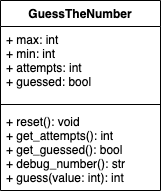

Import `randint` from `random` module.

In [ ]:
from random import randint

Implement `GuessTheNumber` class.

In [ ]:
class GuessTheNumber:
    """ Backend component that on initialization uses random.randint() to
    generate a random number between min-max (1-100 default).
    Has a method guess() that accepts an integer and prints 'lower' or 'higher'
    If the guess is correct, it says so, and also tells the number of attempts.
    """

    def __init__(self, min=1, max=100):
        """ initialize and set range """
        self.max = max
        self.min = min
        self.reset()

    def reset(self):
        """ call reset to enable the game to be played again """
        self.__number = randint(self.min,self.max)
        self.attempts = 0
        self.guessed = False

    def get_attempts(self):
        return self.attempts

    def get_guessed(self):
        return self.guessed

    def debug_number(self):
        return "Generated number is {}.".format(self.__number)

    def guess(self, value):
        """ Call guess and provide a value. Increments attempts and
        prints the appropriate outcome. Also returns a value to be interpreted
        by other functions if needed
        (0 - guessed, 1 - guess higher, -1 - guess lower)
        """
        self.attempts += 1
        if value == self.__number:
            print ("You guessed the number!")
            self.guessed = True
            return 0
        else:
            if value > self.__number:
                print ("Your guess is higher than the generated number")
                return 1
            else:
                print ("Your guess is lower than the generated number")
                return -1

<a id='t4p1tegtn'></a>
##### **Test and Experiment**
Good programming practice suggests testing a class once implemented. Instantiate `GuessTheNumber` class.

In [ ]:
gtn = GuessTheNumber()

Change the input to guess the number.

In [ ]:
gtn.guess(50)

Call `get_attempts()` to show how many guesses it took to find the number.

In [ ]:
gtn.get_attempts()

Reset it and try again.

In [ ]:
gtn.reset()

In [ ]:
your_guess =  # type your guess here

gtn.guess(your_guess)

Play with different parameters (e.g. generate number between 20 and 1000). Use build-in `debug_number()` method to determine which number was generated.

<br>[back to top ↥](#t4p1toc)

<a id='t4p1agc'></a>
#### **▇▂ `AutoGame` Class ▂▂**
Next, we want a class that can have the same functionality, plus iteratively guess the number (one try per call). We can reuse `GuessTheNumber` class and extend it with needed attributes and methods. One way to design such a class would be like the one given in UML class diagram below.

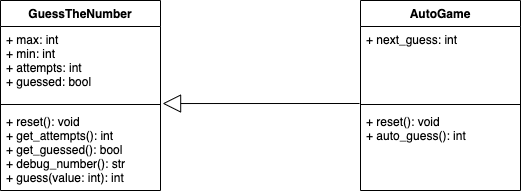

<a id='t4p1agcex'></a>
##### **Exercise**
Implement `AutoGame` class.
`auto_guess()` method should return 0 if number is guessed, 1 if the guess was higher than the generated number, and -1 if it was lower. It is up to you how you want to determine `next_guess` value.

<br>⚠ <b>NOTE</b><br>
>it is perfectly normal and even desirable to extend the class design with helper attributes and methods.<br>

In [ ]:
# class AutoGame # add what is missing

# def reset(self):
# ... implement ...

# def auto_guess(self):
# ... implement ...

# ... add any other helper method if needed ...

If you have implemented `AutoGame` as required, then the following code can be used to simulate one game run and test if everything is working as intended.

In [ ]:
ag = AutoGame()

while not ag.get_guessed():
    print("This bot will try with number", ag.next_guess, "next.")
    ag.auto_guess()
    print()
    
print("The number was guessed after", ag.get_attempts(), "attempts.")

We recommend that you try and implement `AutoGame` by yourself. If you still have difficulty, you can take a look at the design we opted for, as well as the code. Normally, helper attributes and methods are private or protected, but here, for clarity, we made everything public.

Note: teachers may want to explain which methods are called when `AutoGame.__init__()` is triggered. This is an example of **polymorphism**, but it is not our focus at this point.

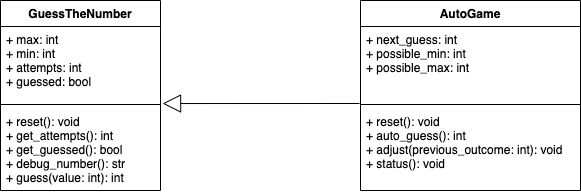

In [ ]:
class AutoGame(GuessTheNumber):
    """ A child of GuessTheNumber.
    Has auto_guess() to automatically guess the next possible value.
    """

    def __init__(self):
        super().__init__()
        # not needed ( due to polymorphism __init__ of GuessTheNumber would call
        # AutoGame.reset() ), added for code clarity
        self.reset()

    def reset(self):
        """ call reset to enable the game to be played again """
        super().reset()
        self.possible_max = self.max
        self.possible_min = self.min
        self.next_guess = int((self.possible_max + self.possible_min) / 2)

    def adjust(self, previous_outcome):
        """ adjust guess based on the previous outcome """
        if previous_outcome != 0:
            if previous_outcome > 0:
                self.possible_max = self.next_guess - 1
            else:
                self.possible_min = self.next_guess + 1
            self.next_guess = int((self.possible_max + self.possible_min) / 2)

    def auto_guess(self):
        """
        Call to to guess the number by trying the middle one of the available
        range.
        """
        res = self.guess(self.next_guess)
        self.adjust(res)
        return res

    def status(self):
        """ For debugging purpose. Prints attributes' values. """
        print ("Generated number is {}; next guess is {} and no. attempts is {}"
            .format(self._GuessTheNumber__number,self.next_guess,self.attempts))
        print ("max: {} min: {}".format(self.possible_max, self.possible_min))

<br>[back to top ↥](#t4p1toc)

<a id='t4p1gameloop'></a>
#### **▇▂ Game Loop ▂▂**
At the heart of every game is its **game loop**. Depending on the complexity of each game, game loops can contain different steps, but every game has three distinct tasks that must be handled:
- get (user) input,
- update the game state,
- draw the game.

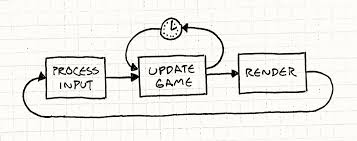</img>

(Source: Game loop; taken from: [https://gameprogrammingpatterns.com/game-loop.html](https://gameprogrammingpatterns.com/game-loop.html)

You can also consider initialization step before entering into **game loop** and clean-up step once it is exited.

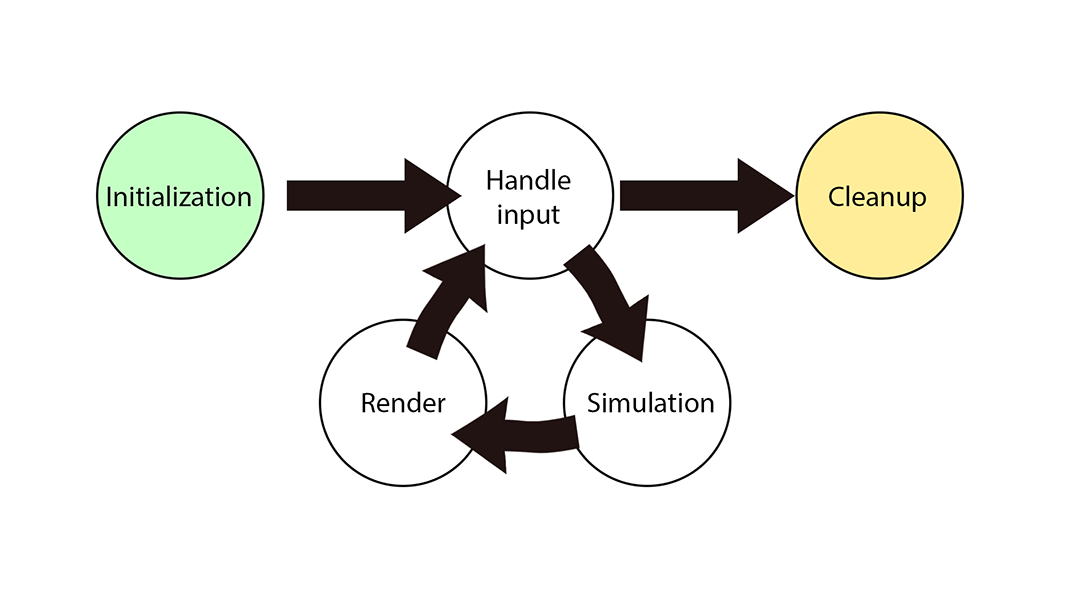</img>

Source: Game loop; taken from: [http://nepos.games/nebuchadnezzar/blog/4](http://nepos.games/nebuchadnezzar/blog/4)

As every game will contain those steps, good design practice is to make a parent template class, that would contain all these **game loop** steps and run them accordingly. Then, we can ***inherit from such a class***, and ***extend*** and ***override only the methods needed***.

Since our first games will writing to console, we will start the game loop with draw, following with user input and finally updating the game states.

<br>[back to top ↥](#t4p1toc)

<a id='t4p1gameclass'></a>
#### **▇▂ Game Class ▂▂**
At its core, game class should be treated as an *abstract class*. But, since we want to test and run it (even though it does nothing special), we need to implement methods: `run()`, as well as `user_input()` and `update()` to allow us to terminate the game loop.
To prevent accidental changes, attribute `running` is made private and two public methods are used to send message to change this flag: `start()` and `quit()`. All other methods representing one step of a game loop should be made abstract.

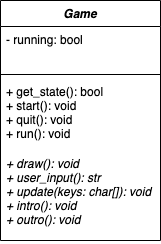

<br>⚠ <b>NOTE</b><br>
>even thou UML class diagram above suggests that `Game` is an abstract class, and methods `draw()`, `user_input()`, `update()`, `intro()`, `outro()` are depicted as abstract (i.e. no implementation given), in our implementation below, they are given as empty, meaning that `Game` class could be instantiated and all of its methods called.<br>

In [ ]:
class Game:
    """
    Game is a base, template class, implementing a simple game loop.
    Create a child class and override the needed methods.
    """
    def __init__(self):
        self.__running = True

    def get_state(self):
        return self.__running

    def start(self):
        """ Internal message to start the game. """
        self.__running = True

    def quit(self):
        """ Internal message to end the game. """
        self.__running = False

    def draw(self):
        pass

    def user_input(self):
        """ Expects input from the user and returns the result. Override."""
        print("Enter Q or QUIT to terminate the game")
        res = input("Please enter your command:")
        return res

    def update(self, keys):
        """ Processes given input. By default quits on Q or QUIT. Override. """
        if keys.upper() == "QUIT" or keys.upper() == "Q":
            self.__running = False

    def intro(self):
        """
        The first method to be called (once) when the game starts. Override.
        """
        pass

    def outro(self):
        """ The last method to be called (once) when the game ends. Override. """
        pass

    def run(self):
        """
        The main 'workhorse' method.
        Calls all other methods according to the game loop.
        """
        self.intro()
        while self.__running:
            self.draw()
            usr = self.user_input()
            self.update(usr)
        self.outro()

<br>[back to top ↥](#t4p1toc)

<a id='t4p1tegameclass'></a>
##### **Test and Experiment**

Let's demonstrate the effectiveness of inheritance and overriding.
Assume you want to create a 'game' that does nothing except print welcoming message for the user, and lets him / her type whatever he / she wants until `quit` or `q` is typed.

Since, all of this is implemented in `Game` class, just create a child class and override `intro()` method. You are encouraged to override other methods as well and create something more exciting.

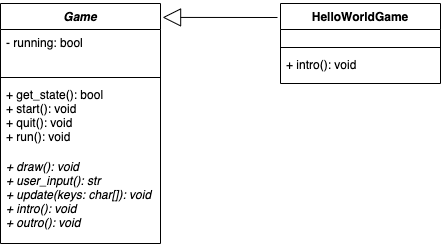

In [ ]:
# implement class HelloWorldGame
# class HelloWorldGame # ...

#    def intro(self):
#        ... override ...

Check if it works.

In [ ]:
game = HelloWorldGame()
game.run()

##### **Solution**

In [ ]:
class HelloWorldGame(Game):

    def intro(self):
        print("Welcome to the Hello World game!")
        print("Type anything you want")

<br>[back to top ↥](#t4p1toc)

<a id='t4p1guessthenumber'></a>
#### **▇▂ GuessTheNumber game ▂▂**
The time has come to combine `Game` class and `GuessTheNumber` class to make a game with decent user interface and limited number of guesses. Use `Game` as the template, and override the 'abstract' methods. In theory, this can be solved as multiple inheritance, but that would complicate the structure needlessly, so it is better to use aggregation, making `GuessTheNumber` class an attribute of to-be-created `GuessTheNumberGame` class.

The recommended design is given below via UML class diagram.

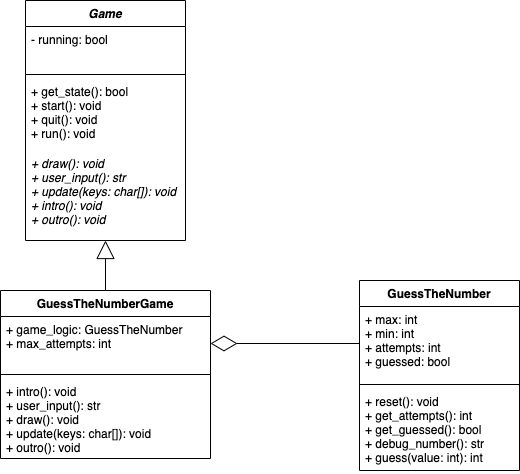

<a id='t4p1iteguessthenumber'></a>
##### **Implement, Test and Experiment**

Implement `GuessTheNumberGame` class.

In [ ]:
# Your implementation goes here ...



Test your game by running it.

In [ ]:
g = GuessTheNumberGame()
g.run()

<br>[back to top ↥](#t4p1toc)

##### **Solution**

Implementing `GuessTheNumberGame` class is a crucial step which shows if you are able to read and implement given designs, as well as if you understand object-oriented relations such as inheritance and aggregation, including method overriding. Therefore, it is strongly recommended not to look at the solution, but make extra effort to implement it on your own. Once done, you can compare your solution with the one we had in mind, and note different programming styles.

In [ ]:
class GuessTheNumberGame(Game):
    def __init__(self):
        super().__init__()
        self.game_logic = GuessTheNumber()
        self.max_attempts = 5

    def intro(self):
        print("Welcome to Guess the number game!")
        print("The computer will generate a number in range 1-100.")
        print("You have 5 attempts to find the target number.")
        print()

        self.game_logic.reset()
        self.start()

    def user_input(self):
        res = int(input("Enter your number:"))
        return res

    def draw(self):
        print()
        print("Try to guess the number.")
        print("You have {} attempts left".format(self.max_attempts - self.game_logic.get_attempts()))

    def update(self, keys):
        res = self.game_logic.guess(keys)
        if res == 0 or self.game_logic.get_attempts() == self.max_attempts:
            self.quit()

    def outro(self):
        print()
        if self.game_logic.get_guessed():
            print("Congratulations! You have guessed the number!")
        else:
            print("Game over! Please try again.")

<br>[back to top ↥](#t4p1toc)

<a id='t4p1botgame'></a>
#### **▇▂ BotGame - Extra Practice ▂▂**
You can go further and use available classes to make a bot game - let computer generate a number and then try to guess it in given number of attempts. Easier option is to follow the same approach like in the `GuessTheNumberGame` class above. But, for extra practice, try inheriting from `GuessTheNumberGame` class and only override the methods that need to be changed.

In [ ]:
# Your implementation goes here ...
# class BotGame # ...


You can test the game in the same manner like done previously.

In [ ]:
g2 = BotGame()
g2.run()

##### **Solution**

In [ ]:
class BotGame(GuessTheNumberGame):
    def __init__(self):
        # ! We don't want to call father's init, but we need grandfather's init
        super(GuessTheNumberGame, self).__init__()
        self.game_logic = AutoGame()
        self.max_attempts = 5

    def user_input(self):
        bot_guess = self.game_logic.next_guess
        print("I will guess: {}".format(bot_guess))
        return bot_guess

    def update(self, keys):
        res = self.game_logic.guess(keys)
        self.game_logic.adjust(res)
        if res == 0 or self.game_logic.get_attempts() == self.max_attempts:
            self.quit()

<br>[back to top ↥](#t4p1toc)